<a href="https://colab.research.google.com/github/marymlucas/sna/blob/main/SNA1_stocks_and_holders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 10.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
ticker1 = yf.Ticker('AAPL')

In [ ]:
ticker1

yfinance.Ticker object <AAPL>

In [ ]:
ticker1.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0779,223962179162
1,Blackrock Inc.,1019810291,2021-12-30,0.0630,181087713372
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0548,157528660323
3,State Street Corporation,633115246,2021-12-30,0.0391,112422274232
4,"FMR, LLC",352204129,2021-12-30,0.0218,62540887186
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0163,46940967060
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0138,39624530995
7,Northern Trust Corporation,190876014,2021-12-30,0.0118,33893853805
8,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,25228506880


In [ ]:
# add a column for the ticker symbol
apple_df = ticker1.institutional_holders
apple_df['Company'] = ticker1.ticker

In [ ]:
apple_df

,Holder,Shares,Date Reported,% Out,Value,Company
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0779,223962179162,AAPL
1,Blackrock Inc.,1019810291,2021-12-30,0.0630,181087713372,AAPL
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0548,157528660323,AAPL
3,State Street Corporation,633115246,2021-12-30,0.0391,112422274232,AAPL
4,"FMR, LLC",352204129,2021-12-30,0.0218,62540887186,AAPL
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0163,46940967060,AAPL
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0138,39624530995,AAPL
7,Northern Trust Corporation,190876014,2021-12-30,0.0118,33893853805,AAPL
8,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177,AAPL
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,25228506880,AAPL


In [ ]:
# repeat for another ticker - Amazon
ticker2 = yf.Ticker('AMZN')
amzn_df = ticker2.institutional_holders
amzn_df['Company'] = ticker2.ticker

In [ ]:
# concatenate the two
df = pd.concat([apple_df, amzn_df])

In [ ]:
df

,Holder,Shares,Date Reported,% Out,Value,Company
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0779,223962179162,AAPL
1,Blackrock Inc.,1019810291,2021-12-30,0.0630,181087713372,AAPL
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0548,157528660323,AAPL
3,State Street Corporation,633115246,2021-12-30,0.0391,112422274232,AAPL
4,"FMR, LLC",352204129,2021-12-30,0.0218,62540887186,AAPL
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0163,46940967060,AAPL
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0138,39624530995,AAPL
7,Northern Trust Corporation,190876014,2021-12-30,0.0118,33893853805,AAPL
8,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177,AAPL
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,25228506880,AAPL


In [ ]:
# create graph
G = nx.from_pandas_edgelist(df, 'Holder', 'Company')

In [ ]:
G.nodes()

NodeView(('Vanguard Group, Inc. (The)', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC', 'Geode Capital Management, LLC', 'Price (T.Rowe) Associates Inc', 'Northern Trust Corporation', 'Bank Of New York Mellon Corporation', 'Norges Bank Investment Management', 'AMZN', 'JP Morgan Chase & Company', 'Capital Research Global Investors', 'Morgan Stanley'))

In [ ]:
G.edges()

EdgeView([('Vanguard Group, Inc. (The)', 'AAPL'), ('Vanguard Group, Inc. (The)', 'AMZN'), ('AAPL', 'Blackrock Inc.'), ('AAPL', 'Berkshire Hathaway, Inc'), ('AAPL', 'State Street Corporation'), ('AAPL', 'FMR, LLC'), ('AAPL', 'Geode Capital Management, LLC'), ('AAPL', 'Price (T.Rowe) Associates Inc'), ('AAPL', 'Northern Trust Corporation'), ('AAPL', 'Bank Of New York Mellon Corporation'), ('AAPL', 'Norges Bank Investment Management'), ('Blackrock Inc.', 'AMZN'), ('State Street Corporation', 'AMZN'), ('FMR, LLC', 'AMZN'), ('Geode Capital Management, LLC', 'AMZN'), ('Price (T.Rowe) Associates Inc', 'AMZN'), ('Northern Trust Corporation', 'AMZN'), ('AMZN', 'JP Morgan Chase & Company'), ('AMZN', 'Capital Research Global Investors'), ('AMZN', 'Morgan Stanley')])

In [ ]:
G.degree

DegreeView({'Vanguard Group, Inc. (The)': 2, 'AAPL': 10, 'Blackrock Inc.': 2, 'Berkshire Hathaway, Inc': 1, 'State Street Corporation': 2, 'FMR, LLC': 2, 'Geode Capital Management, LLC': 2, 'Price (T.Rowe) Associates Inc': 2, 'Northern Trust Corporation': 2, 'Bank Of New York Mellon Corporation': 1, 'Norges Bank Investment Management': 1, 'AMZN': 10, 'JP Morgan Chase & Company': 1, 'Capital Research Global Investors': 1, 'Morgan Stanley': 1})

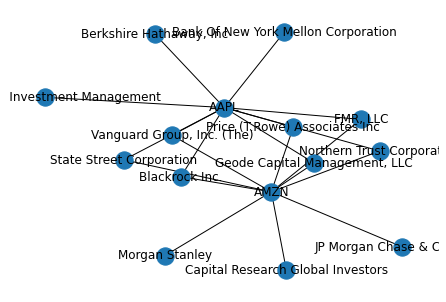

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
# include all companies on the Dow Jones Index
dj = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [ ]:
dj

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.88%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.56%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.88%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.15%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.40%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.19%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.05%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.00%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.28%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.32%


In [ ]:
# extract just the symbols to a list
ticker_list = dj.Symbol.to_list()

In [ ]:
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [ ]:
# iterate through tickers and create dataframes with institutional holders
df = []
for ticker_name in ticker_list:
  ticker_var = yf.Ticker(ticker_name)
  ticker_df = ticker_var.institutional_holders
  ticker_df['Company'] = ticker_var.ticker
  df.append(ticker_df)

In [36]:
all_df = pd.concat(df)

In [44]:
all_df.shape

(300, 6)

In [45]:
all_df.head()

,Holder,Shares,Date Reported,% Out,Value,Company
0,"Vanguard Group, Inc. (The)",50240763,2021-12-30,0.0883,8924266731,MMM
1,Blackrock Inc.,41810186,2021-12-30,0.0735,7426743339,MMM
2,State Street Corporation,30979936,2021-12-30,0.0544,5502966031,MMM
3,"Geode Capital Management, LLC",10780080,2021-12-30,0.0189,1914865610,MMM
4,"Charles Schwab Investment Management, Inc.",10557291,2021-12-30,0.0186,1875291600,MMM


In [46]:
# create graph
G = nx.from_pandas_edgelist(all_df, 'Holder', 'Company')

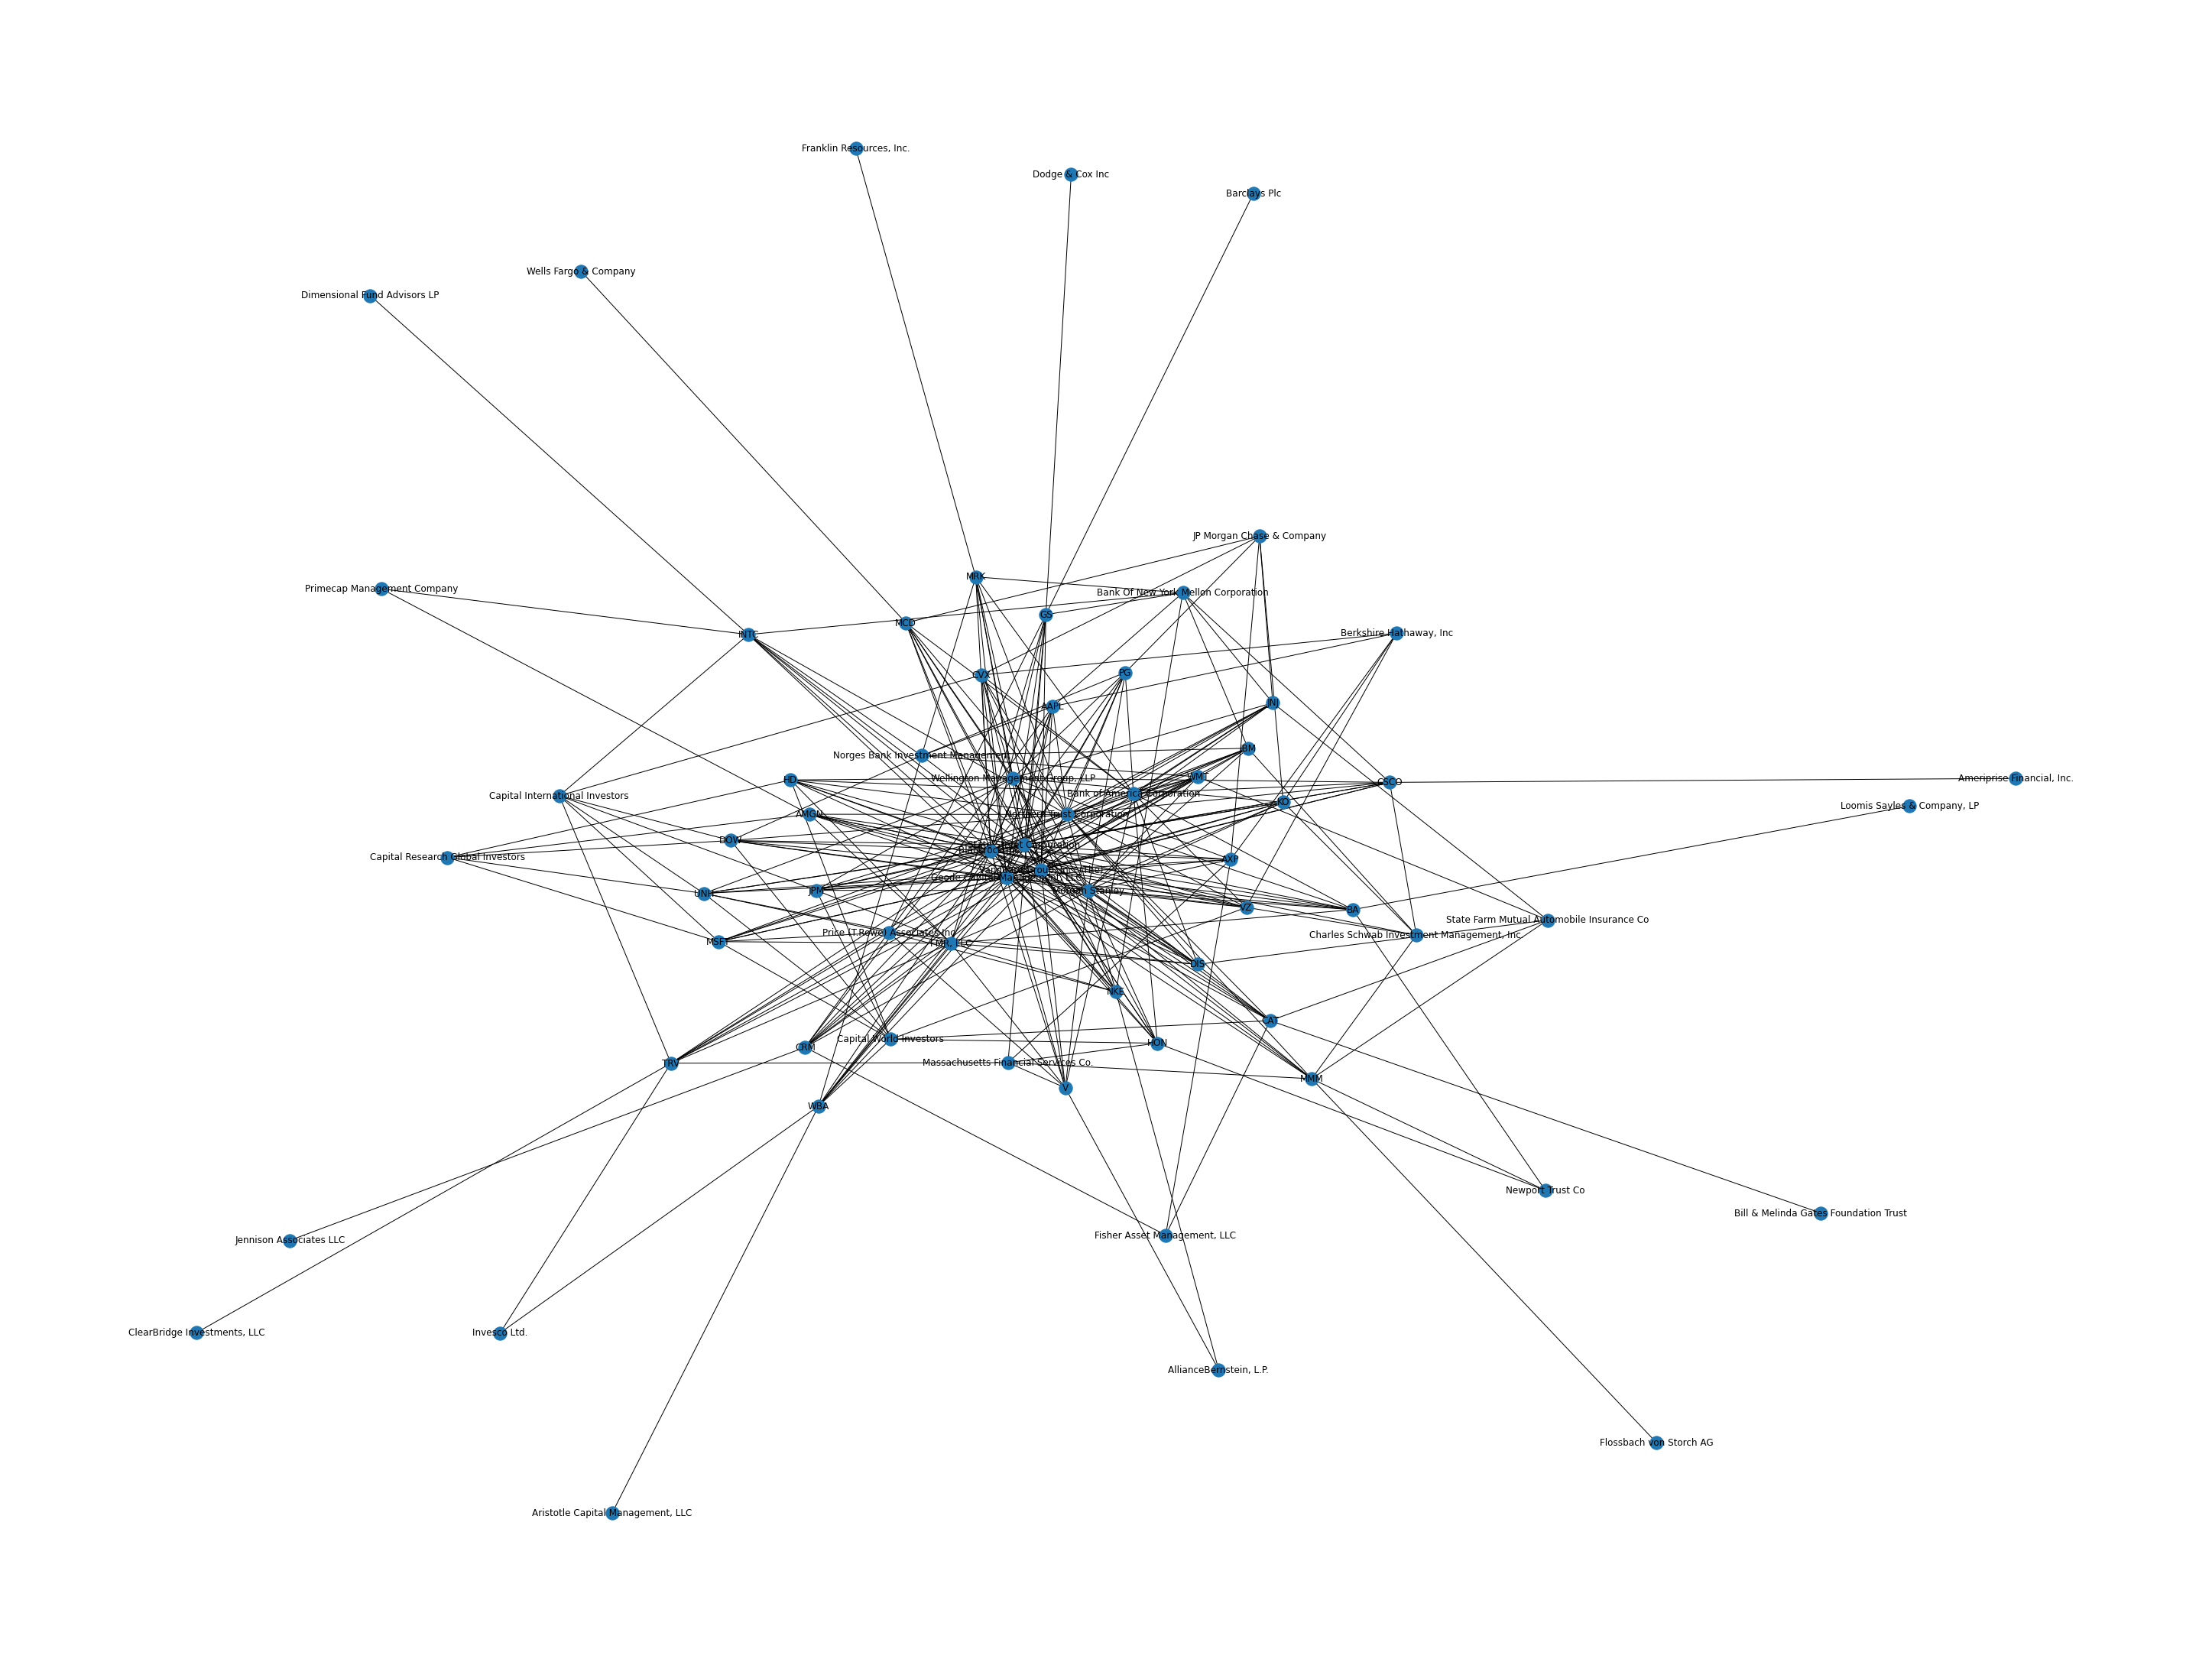

In [55]:
plt.figure(figsize = (40, 30))
nx.draw(G, with_labels=True)

In [56]:
# make node size depend on node degree
G.degree

DegreeView({'Vanguard Group, Inc. (The)': 30, 'MMM': 10, 'Blackrock Inc.': 30, 'State Street Corporation': 30, 'Geode Capital Management, LLC': 30, 'Charles Schwab Investment Management, Inc.': 6, 'Newport Trust Co': 3, 'State Farm Mutual Automobile Insurance Co': 5, 'Flossbach von Storch AG': 1, 'Northern Trust Corporation': 21, 'Massachusetts Financial Services Co.': 6, 'Berkshire Hathaway, Inc': 5, 'AXP': 10, 'Wellington Management Group, LLP': 13, 'Fisher Asset Management, LLC': 3, 'JP Morgan Chase & Company': 6, 'Morgan Stanley': 16, 'AMGN': 10, 'Capital Research Global Investors': 5, 'Primecap Management Company': 2, 'FMR, LLC': 15, 'AAPL': 10, 'Price (T.Rowe) Associates Inc': 10, 'Bank Of New York Mellon Corporation': 8, 'Norges Bank Investment Management': 9, 'BA': 10, 'Loomis Sayles & Company, LP': 1, 'Bank of America Corporation': 15, 'CAT': 10, 'Capital World Investors': 9, 'Bill & Melinda Gates Foundation Trust': 1, 'CVX': 10, 'Capital International Investors': 7, 'CSCO': 1

In [65]:
dict(G.degree()).values()

dict_values([30, 10, 30, 30, 30, 6, 3, 5, 1, 21, 6, 5, 10, 13, 3, 6, 16, 10, 5, 2, 15, 10, 10, 8, 9, 10, 1, 15, 10, 9, 1, 10, 7, 10, 1, 10, 10, 10, 10, 1, 1, 10, 10, 10, 10, 1, 10, 10, 10, 1, 10, 1, 10, 10, 2, 10, 10, 1, 10, 1, 2, 10, 10, 10, 10, 1, 10])

In [61]:
# the degrees are small so will need to use a multiplier to increase the size (select 200)
# extract the degree size using a list comprehension
[d*500 for d in dict(G.degree()).values()]

[15000,
 5000,
 15000,
 15000,
 15000,
 3000,
 1500,
 2500,
 500,
 10500,
 3000,
 2500,
 5000,
 6500,
 1500,
 3000,
 8000,
 5000,
 2500,
 1000,
 7500,
 5000,
 5000,
 4000,
 4500,
 5000,
 500,
 7500,
 5000,
 4500,
 500,
 5000,
 3500,
 5000,
 500,
 5000,
 5000,
 5000,
 5000,
 500,
 500,
 5000,
 5000,
 5000,
 5000,
 500,
 5000,
 5000,
 5000,
 500,
 5000,
 500,
 5000,
 5000,
 1000,
 5000,
 5000,
 500,
 5000,
 500,
 1000,
 5000,
 5000,
 5000,
 5000,
 500,
 5000]

In [ ]:
# let edge size depend on value of shares held


In [77]:
# distinguish between company and holder node types using color
colors = []
for node in G:
  if node in all_df['Holder'].values:
    colors.append('orange')
  else:
    colors.append('green')


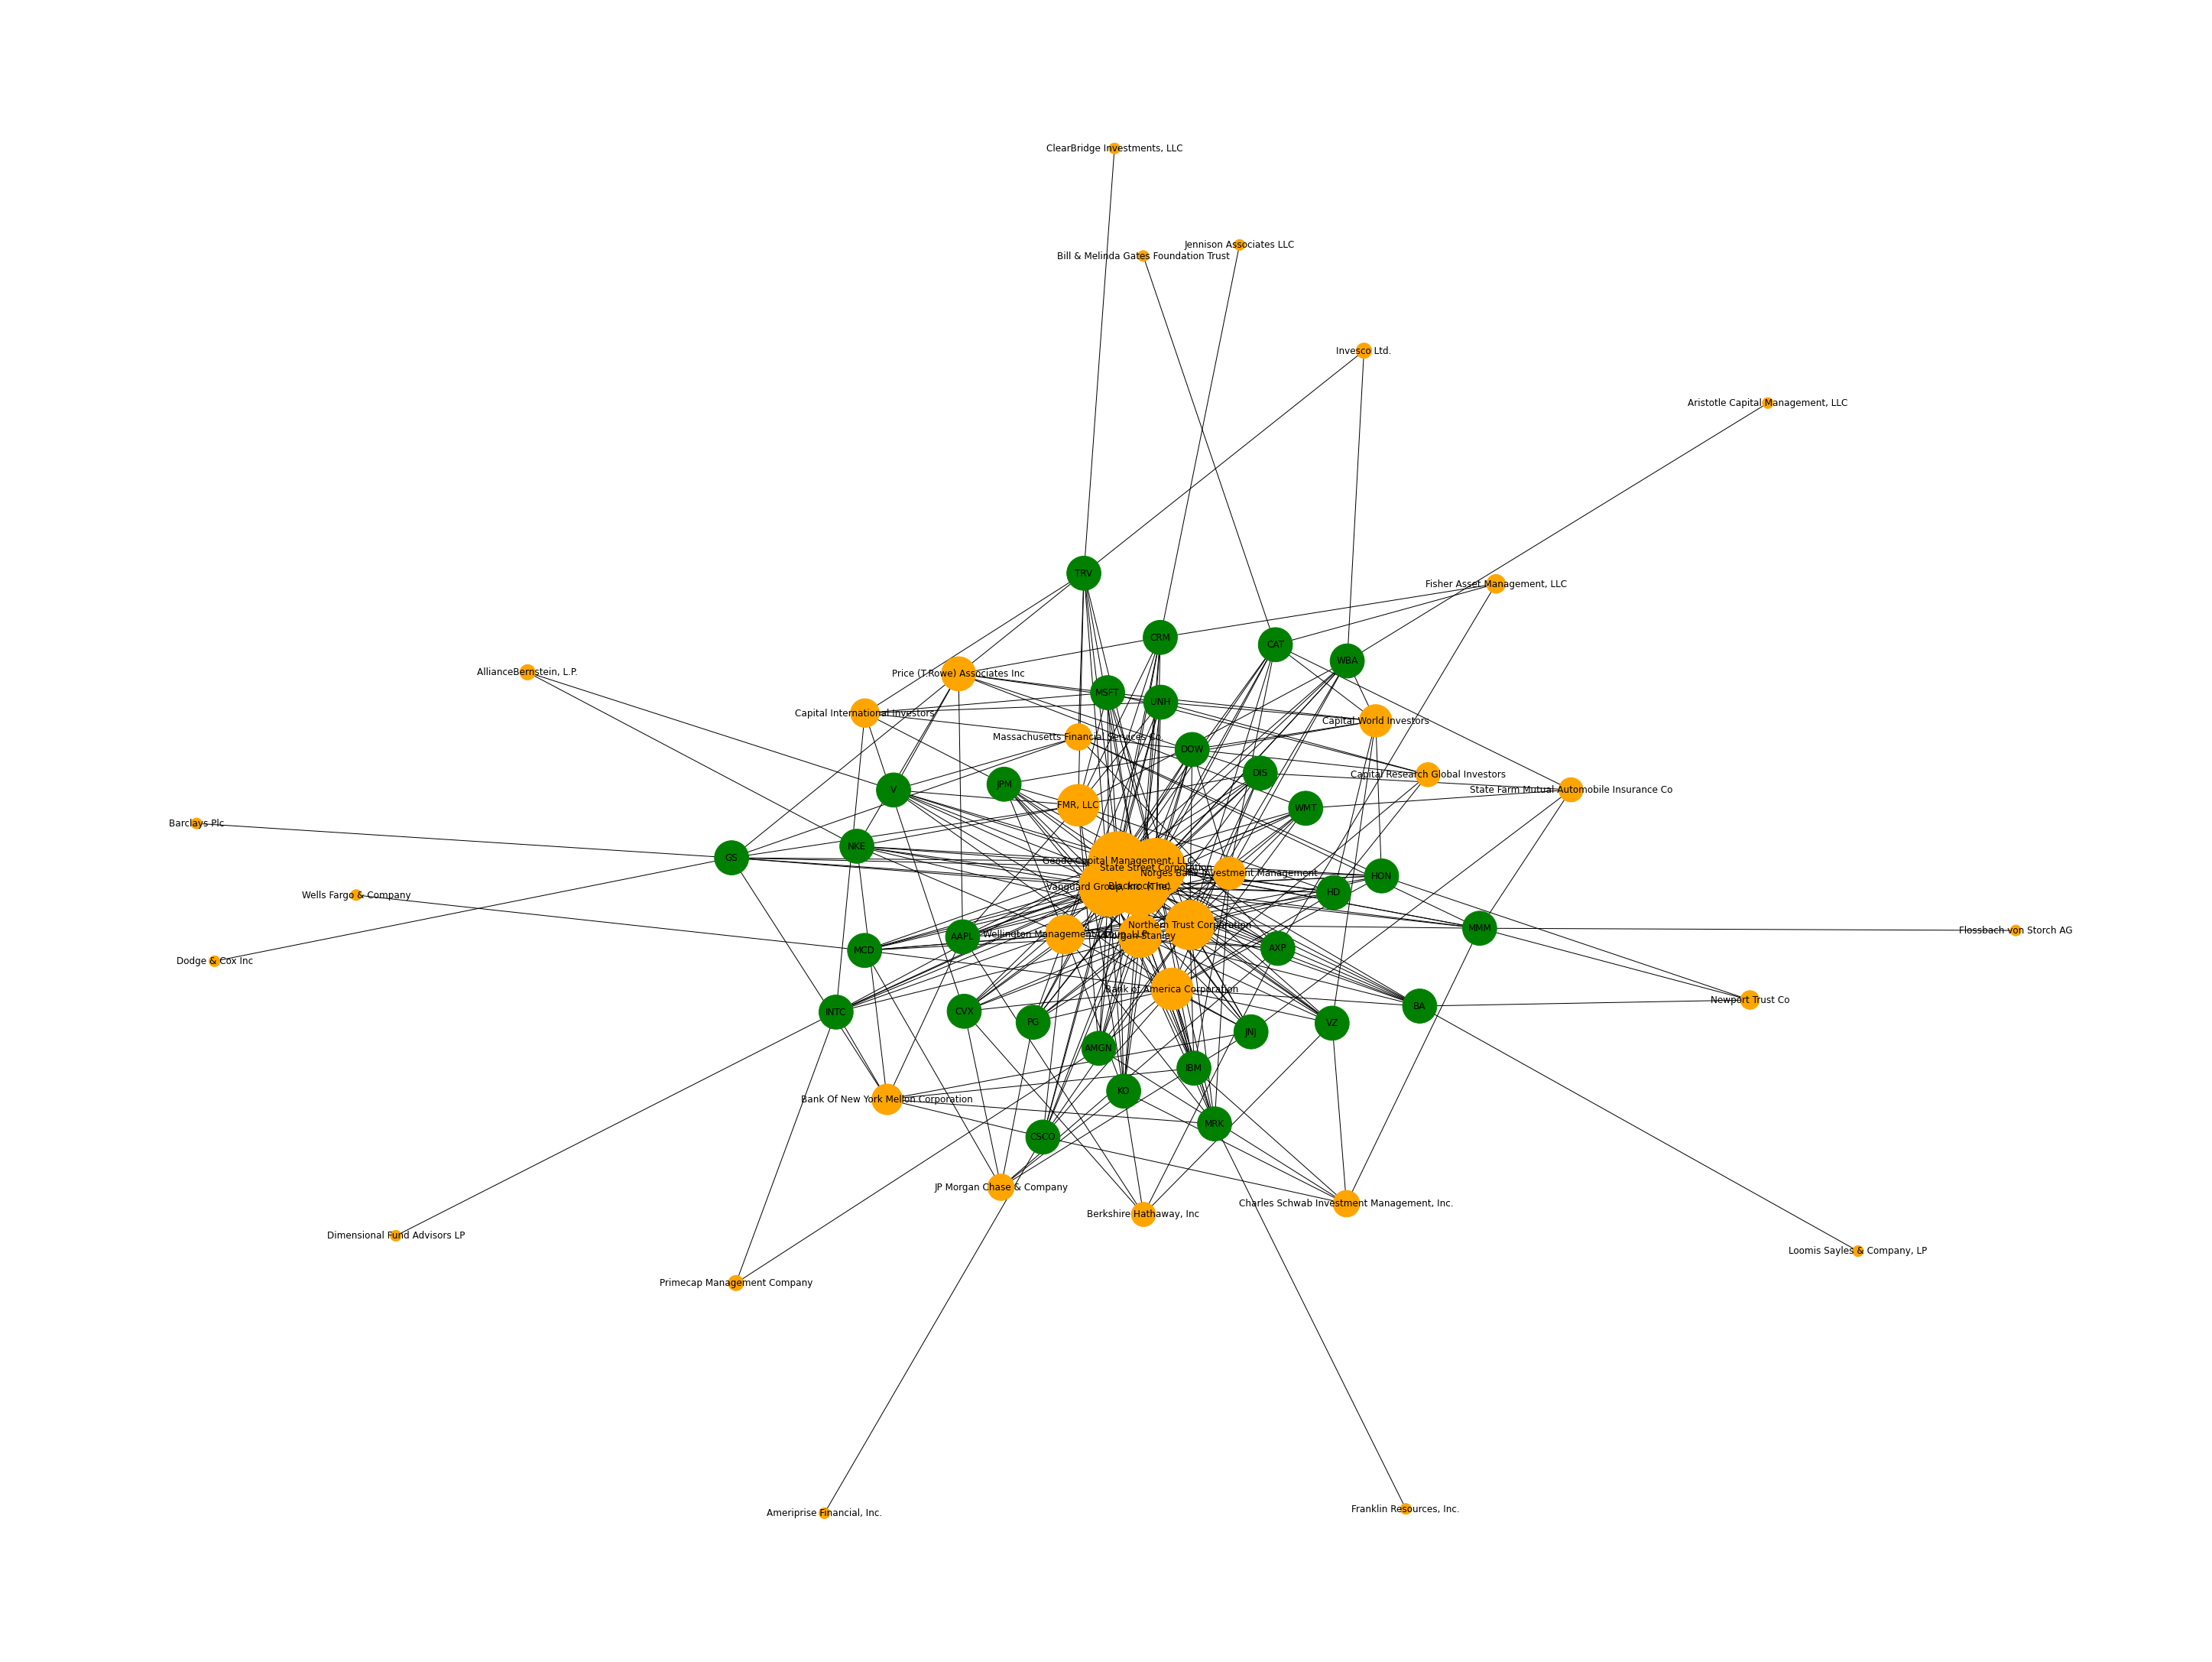

In [78]:
# add attribute to graph
plt.figure(figsize = (40, 30))
nx.draw(G, with_labels=True,
        node_size = [d*200 for d in dict(G.degree()).values()],
        node_color = colors)